In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Crop_recommendation.csv")
df.sample()

,N,P,K,temperature,humidity,ph,rainfall,label
885,28,67,21,21.797926,63.730861,6.250994,46.623702,lentil


In [9]:
df.shape

(2200, 8)

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [12]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

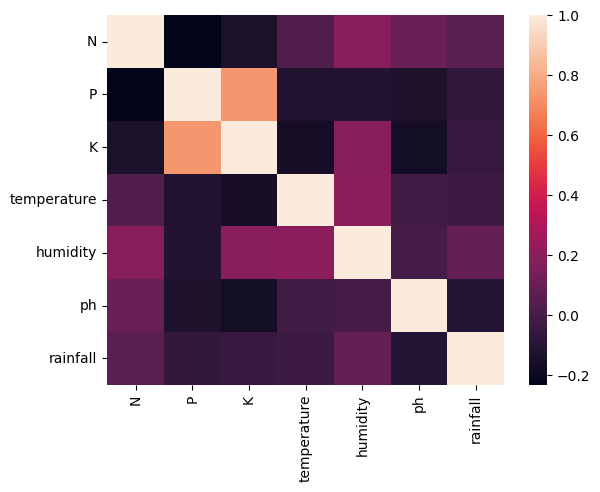

In [16]:
(sns.heatmap(df.drop('label', axis=1).corr()))

# Feature Visualization:

Plot distributions (histograms) for each feature to check for outliers or skewness.

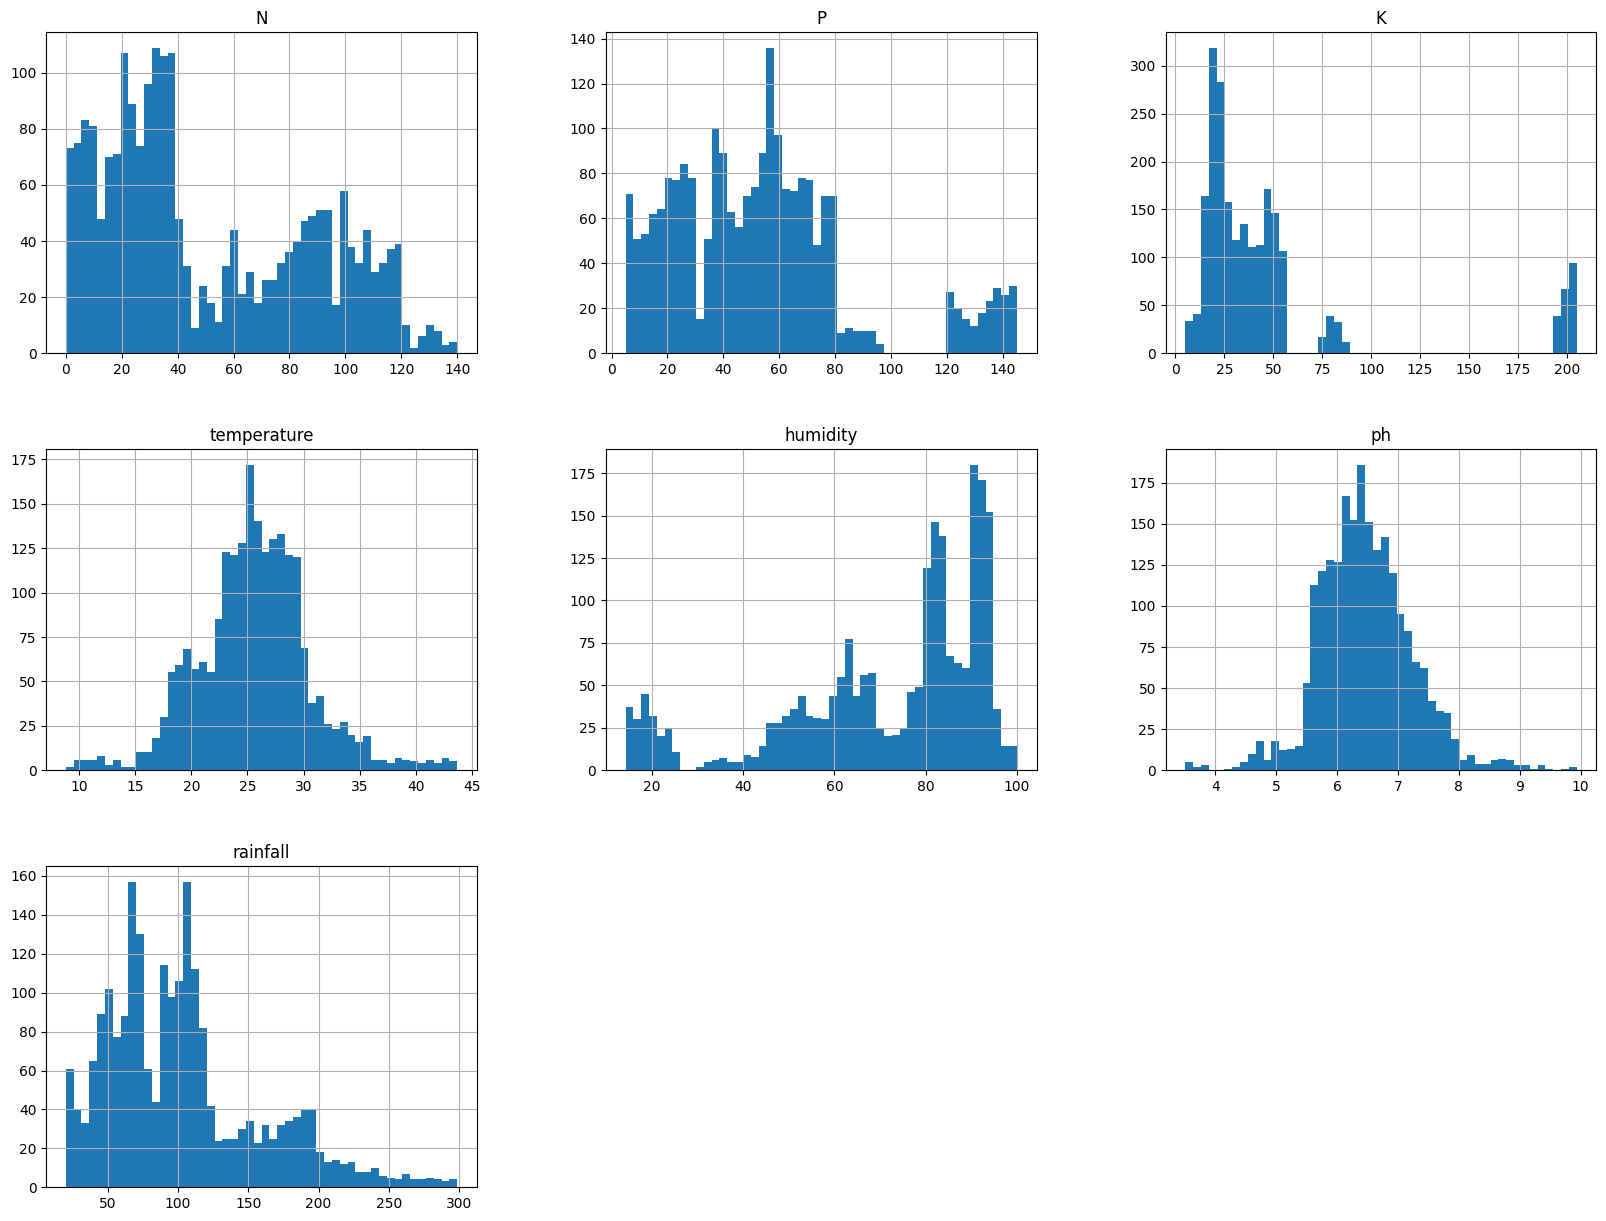

In [ ]:
# Plot distributions (histograms) for each feature to check for outliers or skewness.
df.hist(bins=50, figsize=(20,15))
plt.show()

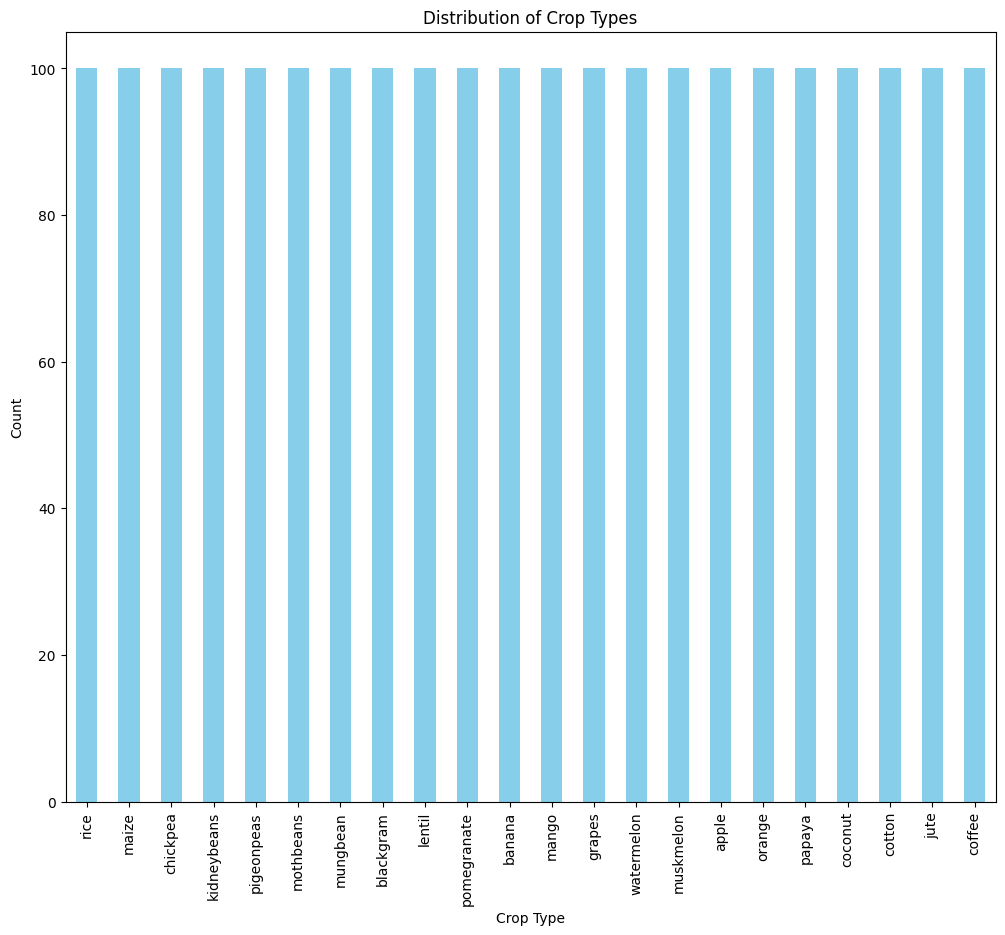

In [20]:
plt.figure(figsize=(12,10))
labels = df['label']
labels.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
X = df.drop('label', axis=1)
y = df['label']

In [29]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [30]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [94]:
class_mapping = {'rice': 0, 'maize': 1, 'jute': 2, 'cotton': 3, 'coconut': 4, 'paddy': 5, 'ground nut': 6, 'kidney beans': 7, 'moth beans': 8, 'coco nut': 9, 'black gram': 10, 'banana': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'berry': 18, 'litchi': 19, 'mango': 20}

In [35]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
    )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Your models and param grids (unchanged names)
models = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=200),
    "SVC (RBF Kernel)": SVC(kernel='rbf', random_state=42, probability=True),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42, max_depth=5)
}

# NOTE: param names below will be used through a Pipeline step named 'clf'
param_grids = {
    "RandomForestClassifier": {
        "clf__n_estimators": [100, 200, 300],
        "clf__max_depth": [5, 10, 15],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    },
    "LogisticRegression": {
        "clf__C": [0.1, 1, 10],
        "clf__penalty": ["l1", "l2"],
        # Choose solvers that support l1/l2; 'liblinear' supports both for binary classification,
        # 'saga' supports both for multi-class as well. Keep both if you expect binary or multiclass.
        "clf__solver": ["liblinear", "saga"]
    },
    "SVC (RBF Kernel)": {
        "clf__C": [0.1, 1, 10],
        "clf__gamma": ["scale", "auto"],
        # kernel included but SVC in models already had kernel='rbf' — keeping option if you want to try others
        "clf__kernel": ["rbf", "poly", "sigmoid"]
    },
    "KNeighborsClassifier": {
        "clf__n_neighbors": [3, 5, 7],
        "clf__weights": ["uniform", "distance"],
        "clf__metric": ["euclidean", "manhattan", "minkowski"]
    },
    "DecisionTreeClassifier": {
        "clf__max_depth": [5, 10, 15],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    }
}

# Which models should get scaling (boolean map)
needs_scaling = {
    "RandomForestClassifier": False,
    "LogisticRegression": True,
    "SVC (RBF Kernel)": True,
    "KNeighborsClassifier": True,
    "DecisionTreeClassifier": False
}


In [68]:
results = []

for model_name, estimator in models.items():
    print(f"\nPreparing pipeline and grid for {model_name}...")

    # Build pipeline: optionally include scaler
    if needs_scaling.get(model_name, False):
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", estimator)
        ])
        print(f" - Added StandardScaler for {model_name}")
    else:
        # pipeline without scaler still useful to keep param names consistent
        pipeline = Pipeline([
            ("clf", estimator)
        ])
        print(f" - No scaler for {model_name} (tree-based or scaling not needed)")

    # Get param grid and ensure keys match pipeline ('clf__' prefix)
    grid = param_grids.get(model_name)
    if grid is None:
        print(f" - No param grid defined for {model_name}. Skipping GridSearchCV.")
        continue

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    print(f"Starting GridSearchCV for {model_name} ...")
    grid_search.fit(X_train, y_train)  # make sure X_train / y_train are defined in scope

    results.append({
        'model_name': model_name,
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'cv_results': grid_search.cv_results_
    })

    print(f"Finished {model_name}. Best CV Score: {grid_search.best_score_:.4f}")


Preparing pipeline and grid for RandomForestClassifier...
 - No scaler for RandomForestClassifier (tree-based or scaling not needed)
Starting GridSearchCV for RandomForestClassifier ...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Finished RandomForestClassifier. Best CV Score: 0.9960

Preparing pipeline and grid for LogisticRegression...
 - Added StandardScaler for LogisticRegression
Starting GridSearchCV for LogisticRegression ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\AISpr\Desktop\Codebase\Django-ML\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Finished LogisticRegression. Best CV Score: 0.9807

Preparing pipeline and grid for SVC (RBF Kernel)...
 - Added StandardScaler for SVC (RBF Kernel)
Starting GridSearchCV for SVC (RBF Kernel) ...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Finished SVC (RBF Kernel). Best CV Score: 0.9852

Preparing pipeline and grid for KNeighborsClassifier...
 - Added StandardScaler for KNeighborsClassifier
Starting GridSearchCV for KNeighborsClassifier ...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Finished KNeighborsClassifier. Best CV Score: 0.9807

Preparing pipeline and grid for DecisionTreeClassifier...
 - No scaler for DecisionTreeClassifier (tree-based or scaling not needed)
Starting GridSearchCV for DecisionTreeClassifier ...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Finished DecisionTreeClassifier. Best CV Score: 0.9852


In [69]:
# convert results to pandas dataframe
results_df = pd.DataFrame(results)
# results_df.to_csv("results.csv", index=False)



In [70]:
results_df = pd.DataFrame(results)
results_df


,model_name,best_estimator,best_params,best_score,cv_results
0,RandomForestClassifier,"((DecisionTreeClassifier(max_depth=10, max_fea...","{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.996023,"{'mean_fit_time': [0.5416503429412842, 0.92054..."
1,LogisticRegression,"(StandardScaler(), LogisticRegression(C=10, ma...","{'clf__C': 10, 'clf__penalty': 'l1', 'clf__sol...",0.980682,"{'mean_fit_time': [0.18006229400634766, 1.2846..."
2,SVC (RBF Kernel),"(StandardScaler(), SVC(C=10, probability=True,...","{'clf__C': 10, 'clf__gamma': 'scale', 'clf__ke...",0.985227,"{'mean_fit_time': [2.1997852325439453, 1.36456..."
3,KNeighborsClassifier,"(StandardScaler(), KNeighborsClassifier(metric...","{'clf__metric': 'manhattan', 'clf__n_neighbors...",0.980682,"{'mean_fit_time': [0.006315803527832032, 0.005..."
4,DecisionTreeClassifier,"(DecisionTreeClassifier(max_depth=15, min_samp...","{'clf__max_depth': 15, 'clf__min_samples_leaf'...",0.985227,"{'mean_fit_time': [0.011051559448242187, 0.012..."


In [75]:
model_vs_accuracy = pd.DataFrame(results_df, columns=['model_name', 'best_score'])
model_vs_accuracy.sort_values(by='best_score', ascending=False, inplace=True)
model_vs_accuracy.reset_index(drop=True, inplace=True)
model_vs_accuracy


,model_name,best_score
0,RandomForestClassifier,0.996023
1,SVC (RBF Kernel),0.985227
2,DecisionTreeClassifier,0.985227
3,LogisticRegression,0.980682
4,KNeighborsClassifier,0.980682


In [ ]:
import pickle
# save the best model
best_model = results_df.loc[results_df['best_score'].idxmax()]['best_estimator']
pickle.dump(best_model, open("best_model.pkl", "wb"))

import json
json.dump(results_df.loc[results_df['best_score'].idxmax()]['best_params'], open("top_model_params.json", "w"))

In [85]:
bundle = {
    'model_name': best_model,
    'features_cols': X.columns.tolist(),
    'classes' : best_model.classes_
}

with open('bundle.pkl', 'wb') as f:
    pickle.dump(bundle, f)

In [86]:
bundle

{'model_name': Pipeline(steps=[('clf',
                  RandomForestClassifier(max_depth=10, min_samples_split=5,
                                         random_state=42))]),
 'features_cols': ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
 'classes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21])}

In [88]:
with open('bundle.pkl', 'rb') as f:
    bundle = pickle.load(f)

bundle

{'model_name': Pipeline(steps=[('clf',
                  RandomForestClassifier(max_depth=10, min_samples_split=5,
                                         random_state=42))]),
 'features_cols': ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
 'classes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21])}

In [89]:
# testing one row as smaple for prediction
sample = {'N': 10, 'P': 20, 'K': 30, 'temperature': 25, 'humidity': 70, 'ph': 6.5, 'rainfall': 50}
model_input = [[sample[c] for c in bundle['features_cols']]]

In [101]:
demapping = {v: k for k, v in class_mapping.items()}
print("pred:", demapping[bundle['model_name'].predict(model_input)[0]])

pred: rice
